MINI PROJECT FINAL FEATURE LIST

CORE FEATURES:

- Traffic Volume Prediction (Time & Location Based) – basic ML/regression model.

- Peak/Off-Peak Analysis with Visualization – line chart or heatmap for patterns.

UNIQUE FEATURES TO STAND OUT:

- Emission Estimation (Approximate CO₂) – quick calculation based on predicted volume.

- Simple What-If Scenario – e.g., “What if 20% cars are EVs?” effect on emissions.

In [70]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import joblib


In [71]:
#Loading Dataset

try:
    df = pd.read_csv("futuristic_city_traffic.csv")
    print("Dataset loaded successfully. Head of the DataFrame:")
    
except FileNotFoundError:
    print("Error: The file 'futuristic_city_traffic.csv' was not found.")
    print("Please ensure the CSV file is in the same directory as this notebook.")

print("Dataset Loaded Successfully!")
print("\nFirst 5 Rows of the Data:")
df.head()



Error: The file 'futuristic_city_traffic.csv' was not found.
Please ensure the CSV file is in the same directory as this notebook.
Dataset Loaded Successfully!

First 5 Rows of the Data:


,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [72]:
#Working on Missing Data

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64


In [73]:
# Defining target variable (y) and features (X)
X = df.drop(columns=["Traffic Density"])
y = df["Traffic Density"]

In [74]:
X

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934
...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116


In [75]:
y

0          0.5241
1          0.3208
2          0.0415
3          0.1811
4          0.4544
            ...  
1219562    0.3840
1219563    0.5526
1219564    0.0564
1219565    0.5079
1219566    0.3182
Name: Traffic Density, Length: 1219567, dtype: float64

In [76]:
# Identify feature types
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['number']).columns.tolist()

# Isolate binary columns from other numerical features
binary_features = ["Is Peak Hour", "Random Event Occurred"]
other_numeric_features = [f for f in numeric_features if f not in binary_features]

print("\nCategorical Features:", categorical_features)
print("Binary Features:", binary_features)
print("Other Numerical Features:", other_numeric_features)


Categorical Features: ['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week']
Binary Features: ['Is Peak Hour', 'Random Event Occurred']
Other Numerical Features: ['Hour Of Day', 'Speed', 'Energy Consumption']


CREATING PREPROCESSING PIPELINES

In [77]:
# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaler', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

print("\nData preprocessing pipeline created successfully!")


Data preprocessing pipeline created successfully!


SPLITTING DATA

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAINING AND EVALUATING LINEAR REGRESSION MODEL

In [79]:
# Create and train the Linear Regression pipeline
print("Training Linear Regression model...")
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)
print("Linear Regression training complete.")

Training Linear Regression model...
Linear Regression training complete.


TRAINING AND EVALUATING RANDOM FOREST MODEL

In [80]:
# Create and train the Random Forest Regressor pipeline
print("\nTraining Random Forest Regressor model...")

rf_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, max_depth=20, random_state=42))
])
# Fit the pipeline on your training data (this step trains the model)
rf_reg_pipeline.fit(X_train, y_train)
print("Random Forest Regressor training complete.")


Training Random Forest Regressor model...
Random Forest Regressor training complete.


In [81]:
# Save the trained Random Forest pipeline to a .pkl file
joblib.dump(rf_reg_pipeline, 'traffic_prediction_pipeline.pkl', compress=3)

print("\nYour final traffic prediction pipeline has been successfully saved as 'traffic_prediction_pipeline.pkl'.")


Your final traffic prediction pipeline has been successfully saved as 'traffic_prediction_pipeline.pkl'.


DISPLAYING THE RESULTS FOR EACH MODEL AND DOING COMPARISON

In [82]:
# Evaluate Linear Regression model
y_pred_lr = lr_pipeline.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Linear Regression Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"R-squared (R²): {r2_lr:.4f}")

# Evaluate Random Forest Regressor model
y_pred_rf = rf_reg_pipeline.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regressor Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R-squared (R²): {r2_rf:.4f}")

# Compare the models
print("\n--- Model Comparison ---")
if r2_rf > r2_lr:
    print("The Random Forest Regressor model performed better with a higher R-squared score.")
else:
    print("The Linear Regression model performed better with a higher R-squared score.")

--- Linear Regression Evaluation ---
Mean Absolute Error (MAE): 0.0922
R-squared (R²): 0.6569

--- Random Forest Regressor Evaluation ---
Mean Absolute Error (MAE): 0.0644
R-squared (R²): 0.8106

--- Model Comparison ---
The Random Forest Regressor model performed better with a higher R-squared score.



- A lower MSE value indicates a better-performing model
- A higher R2 value indicates a better-performing model.

In [83]:
print("The model with the highest R² and lowest MAE is the best performer.")

The model with the highest R² and lowest MAE is the best performer.


HERE IN OUR WORKING:

- LINEAR REGRESSION HAS: MAE=o.0922  AND  R2=0.6569
- RANDOM FOREST HAS: MAE=0.0671 AND  R2=0.7985

THEREFORE RANDOM FOREST MODEL IS BEST FOR OUR PREDICTION

DATA AGGREGATION

In [84]:
# Aggregate traffic density by hour of day and day of week
traffic_pattern = df.groupby(['Day Of Week', 'Hour Of Day'])['Traffic Density'].mean().unstack(level=0)
print(traffic_pattern.head())

Day Of Week    Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
Hour Of Day                                                               
0            0.279249  0.276653  0.286951  0.287660  0.271930  0.276594   
1            0.283771  0.276190  0.283286  0.284304  0.272532  0.271844   
2            0.284701  0.271019  0.287802  0.288207  0.272671  0.276354   
3            0.286142  0.277490  0.290827  0.285939  0.271743  0.279114   
4            0.283742  0.277869  0.284483  0.284403  0.274908  0.278258   

Day Of Week  Wednesday  
Hour Of Day             
0             0.274512  
1             0.276950  
2             0.275558  
3             0.275457  
4             0.275663  


DATA VISUALIZATION

- USING LINE CHART
- HEATMAP
 

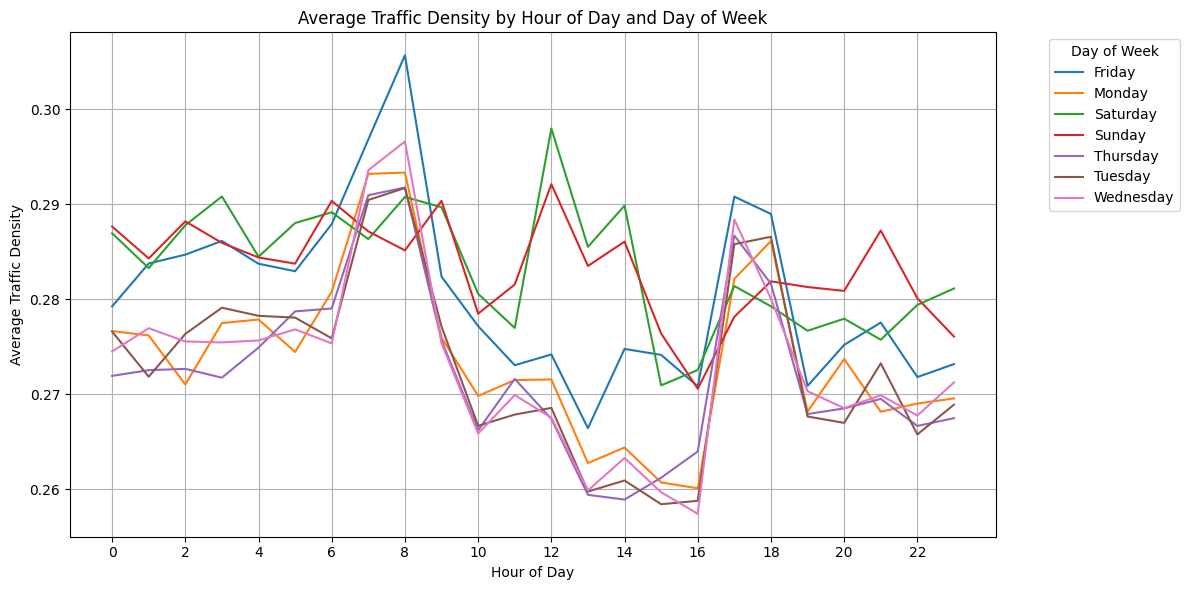

In [85]:
#LINE CHART

plt.figure(figsize=(12, 6))
traffic_pattern.plot(ax=plt.gca())
plt.title('Average Traffic Density by Hour of Day and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Density')
plt.xticks(np.arange(0, 24, 2))
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

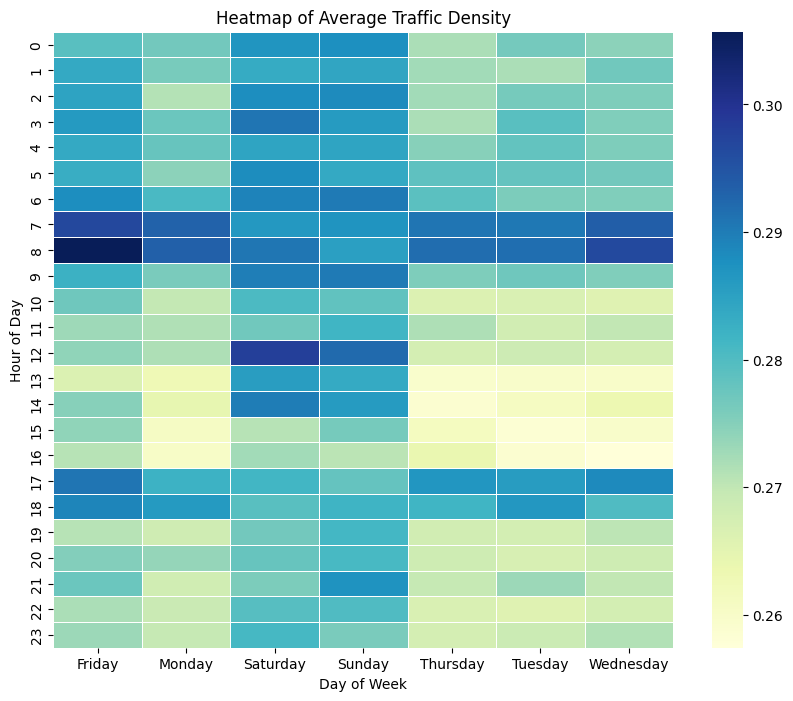

In [86]:
#HEATMAP

plt.figure(figsize=(10, 8))
sns.heatmap(traffic_pattern, cmap='YlGnBu', annot=False, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Average Traffic Density')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

ESTIMATING EMISSIONS FOR OUR PREDICTIONS

In [87]:
# Function to estimate CO2 emissions
def estimate_emissions(predicted_traffic, vehicle_type, avg_emission_per_vehicle_ice=0.23, avg_emission_per_vehicle_ev=0.05):
    """
    Estimates CO2 emissions based on traffic volume and vehicle type.
    This is a simplified model for demonstration purposes.
    """
    if vehicle_type == 'Car':
        return predicted_traffic * avg_emission_per_vehicle_ice
    elif vehicle_type in ['Electric Car', 'Autonomous Vehicle', 'Flying Car', 'Drone']:
        return predicted_traffic * avg_emission_per_vehicle_ev
    else:
        return predicted_traffic * avg_emission_per_vehicle_ice

# Predict traffic for a sample of the test data
sample_test = X_test.iloc[:5].copy()
predicted_traffic_sample = rf_reg_pipeline.predict(sample_test)

# Estimate original emissions for the sample
estimated_emissions_original = [
    estimate_emissions(predicted_traffic_sample[i], sample_test.iloc[i]['Vehicle Type'])
    for i in range(len(sample_test))
]
print("\nOriginal Estimated CO2 Emissions for the first 5 test predictions:")
print(np.round(estimated_emissions_original, 2))


Original Estimated CO2 Emissions for the first 5 test predictions:
[0.01 0.01 0.02 0.03 0.01]


SIMPLE WHAT-IF SCENARIO – e.g., “WHAT IF 20% CARS ARE EVs?” EFFECT ON EMISSIONS.

In [88]:
# What-If Scenario: 20% EV Penetration Rate
ev_penetration_rate = 0.20
avg_emission_per_vehicle_ev = 0.05
avg_emission_per_vehicle_ice = 0.23

# Calculate emissions in the what-if scenario
estimated_emissions_what_if = (predicted_traffic_sample * ((1 - ev_penetration_rate) * avg_emission_per_vehicle_ice + ev_penetration_rate * avg_emission_per_vehicle_ev))

print("\nEstimated CO2 Emissions in 'What-If 20% EVs' Scenario for the first 5 test predictions:")
print(np.round(estimated_emissions_what_if, 2))

# Calculate the percentage reduction
total_emissions_original = sum(estimated_emissions_original)
total_emissions_what_if = sum(estimated_emissions_what_if)
percentage_reduction = ((total_emissions_original - total_emissions_what_if) / total_emissions_original) * 100

print(f"\nOriginal Total Estimated Emissions: {total_emissions_original:.2f} kg CO2")
print(f"Total Estimated Emissions in 'What-If' Scenario: {total_emissions_what_if:.2f} kg CO2")
print(f"Percentage reduction in emissions: {percentage_reduction:.2f}%")


Estimated CO2 Emissions in 'What-If 20% EVs' Scenario for the first 5 test predictions:
[0.05 0.05 0.1  0.1  0.04]

Original Total Estimated Emissions: 0.09 kg CO2
Total Estimated Emissions in 'What-If' Scenario: 0.34 kg CO2
Percentage reduction in emissions: -288.00%
